<a href="https://colab.research.google.com/github/nraoamuktha/Academic_projects/blob/main/section0502_group08_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Tickers **(AMZN, AAPL)** from Yahoo Finance, for the period *12-31-2014 through 12-31-2019 (both dates inclusive)* have been downloaded as AMZN.csv and AAPL.csv.

In [1]:
# Import all the neccessary libraries
%matplotlib inline
import matplotlib as mpl
# Import pyplot as plt
import matplotlib.pyplot as pt
import pandas as pd
import numpy as np

In [2]:
# Define function read price data
def read_price_data(filename, index_col=0, parse_dates=True):

    # Load the csv file into a new dataframe stock_hist
    stock_hist = pd.read_csv(filename, index_col=index_col ,parse_dates=parse_dates)

    # Verify dataframe information by highlighting the DatatimeIndex
    print('Stock Information:\n')
    print(f'{stock_hist.info()}\n')

    # Check the existence of null values
    print('NULL values check:\n')
    print(f'{stock_hist.isnull().sum()}\n')

    # Showcase the summary statistics
    print('Summary statistics:\n')
    print(f'{stock_hist.describe()}\n')

    # Verify the start dates
    print('Check the first few rows:\n')
    print(f'{stock_hist.head()}\n')

    # Verify the end dates
    print('Check the last few rows:\n')
    print(f'{stock_hist.tail()}\n')

    return stock_hist

In [3]:
# Read the stock price history file of AMZN
AMZN_df = read_price_data('AMZN.csv')

#Renaming the Adj_Close column to security name
#AMZN_df = AMZN_df.rename(columns = {'Adj Close': 'AMZN'})

Stock Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
None

NULL values check:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Summary statistics:

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     55.742699    56.241898    55.145867    55.720409    55.720409   
std      26.638782    26.865552    26.335057    26.610040    26.610040   
min      14.314000    14.539500    14.

In [4]:
# Read the stock price history file of AAPL
AAPL_df = read_price_data('AAPL.csv')

Stock Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
None

NULL values check:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Summary statistics:

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     38.591088    38.930586    38.260240    38.610385    36.438027   
std      11.001897    11.102899    10.925370    11.029889    11.229058   
min      22.500000    22.917500    22.

In [5]:
# Function to plot columns
def plot_and_format_y_axis(data_frame, formatter= mpl.ticker.ScalarFormatter() ,aspect_ratio=(12,8), title='', ylabel='', grid = True):

    pt.figure(figsize=aspect_ratio)
    for column in data_frame.columns:
        pt.plot(data_frame.index, data_frame[column], label=column)

    pt.title(title)
    pt.xlabel('Date')
    pt.ylabel(ylabel)
    pt.grid(grid)
    pt.legend()
    if formatter:
        pt.gca().yaxis.set_major_formatter(formatter)
    pt.show()

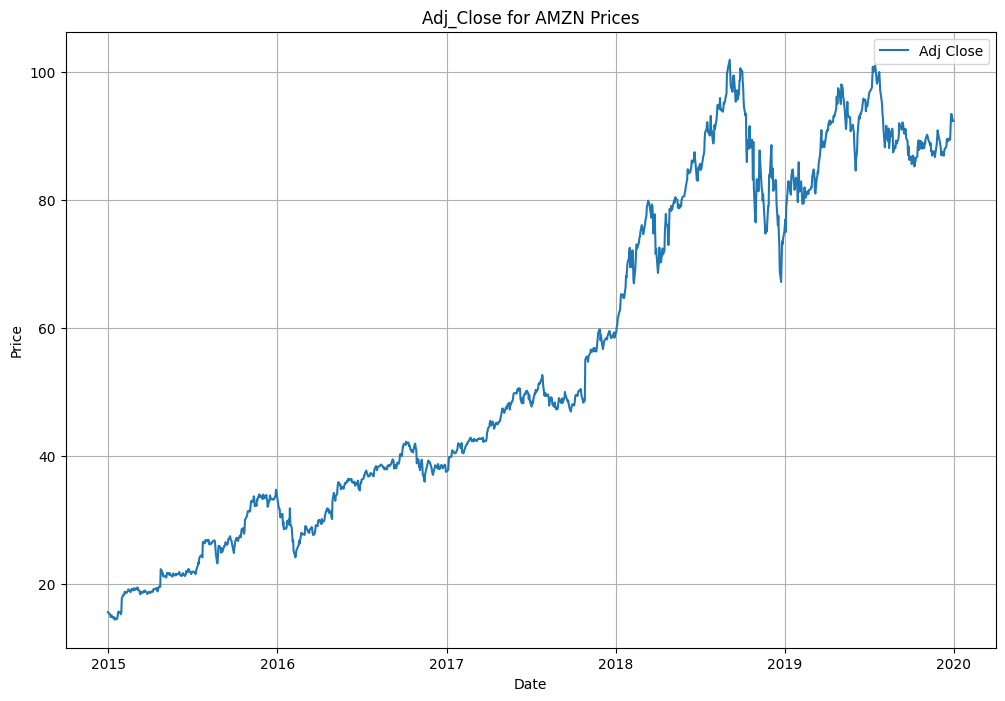

In [6]:
plot_and_format_y_axis(AMZN_df[['Adj Close']], title='Adj_Close for AMZN Prices', ylabel='Price')

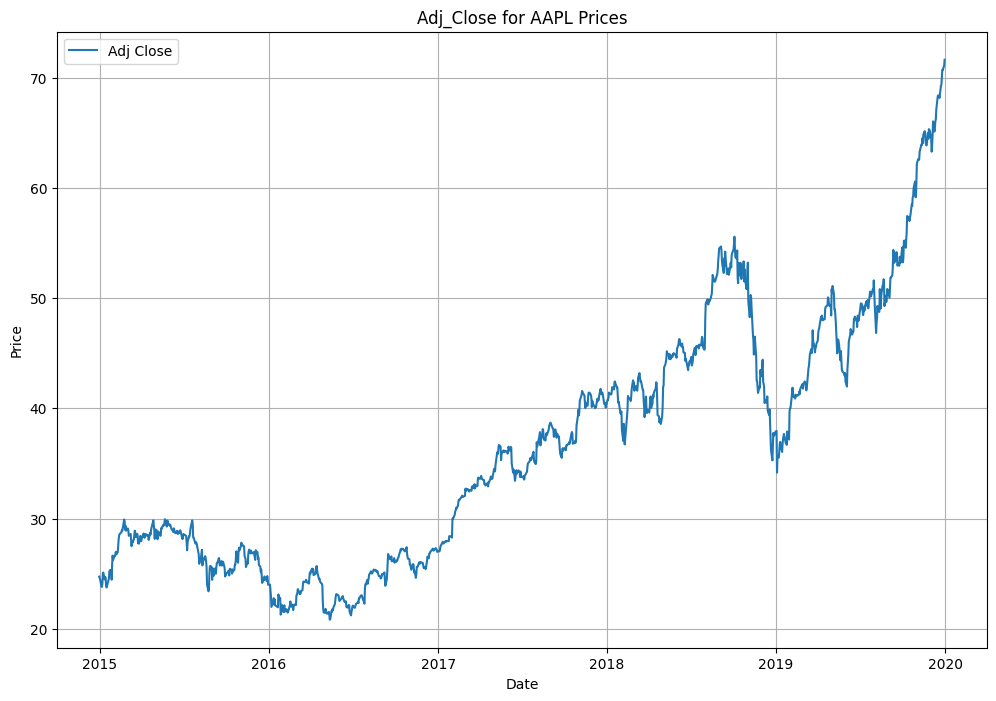

In [7]:
plot_and_format_y_axis(AAPL_df[['Adj Close']], title='Adj_Close for AAPL Prices', ylabel='Price')

In [8]:
# Extract the Adjusted close columns of both stocks
AMZN_adj = pd.DataFrame(AMZN_df['Adj Close'])
AAPL_adj = pd.DataFrame(AAPL_df['Adj Close'])

# Rename the columns of both dataframes
AMZN_adj.columns = ['AMZN']
AAPL_adj.columns = ['AAPL']

# Merge both stocks into a single dataframe
merged_adj_close = pd.merge(AMZN_adj, AAPL_adj, how='inner', left_index=True, right_index=True)
merged_adj_close

,AMZN,AAPL
Date,,
2014-12-31,15.517500,24.733967
2015-01-02,15.426000,24.498682
2015-01-05,15.109500,23.808519
2015-01-06,14.764500,23.810757
2015-01-07,14.921000,24.144629
...,...,...
2019-12-24,89.460503,69.327438
2019-12-26,93.438499,70.702934
2019-12-27,93.489998,70.676109


<Axes: title={'center': 'Adjusted Close Prices'}, xlabel='Date', ylabel='Price'>

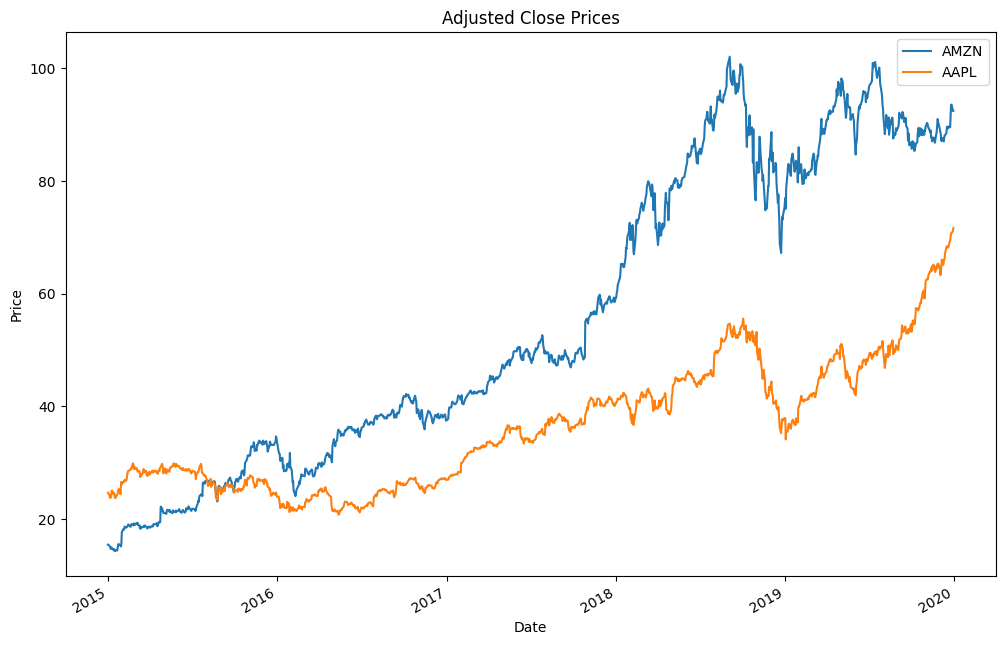

In [9]:
# Plot the adjusted close prices of securities
aspect_ratio = (12,8)
merged_adj_close.plot(figsize=aspect_ratio, title='Adjusted Close Prices', ylabel = 'Price')

In [10]:
#To normalize the prices. the initial_investment variable is just a convenient constant in case we want to
# normalize it to a starting value other than $1. In that case, we just have to set a different value for this variable
# the normalized prices times the initial investment now yields an actual $-value of holding the securities, also called
# an NAV (net asset value)
initial_investment = 1
portfolioNormalized = merged_adj_close / merged_adj_close.iloc[0]

In [11]:
# next, we can simply multiply this portfolio by the scalar initial to get the previously constructed portfolio
portfolioAlternate = initial_investment * portfolioNormalized

In [12]:
  # that gives us back the previously constructed portfolio
portfolioAlternate

,AMZN,AAPL
Date,,
2014-12-31,1.000000,1.000000
2015-01-02,0.994103,0.990487
2015-01-05,0.973707,0.962584
2015-01-06,0.951474,0.962674
2015-01-07,0.961560,0.976173
...,...,...
2019-12-24,5.765136,2.802924
2019-12-26,6.021492,2.858536
2019-12-27,6.024811,2.857451


<Axes: title={'center': 'Normalized Portfolio NAVs'}, xlabel='Date'>

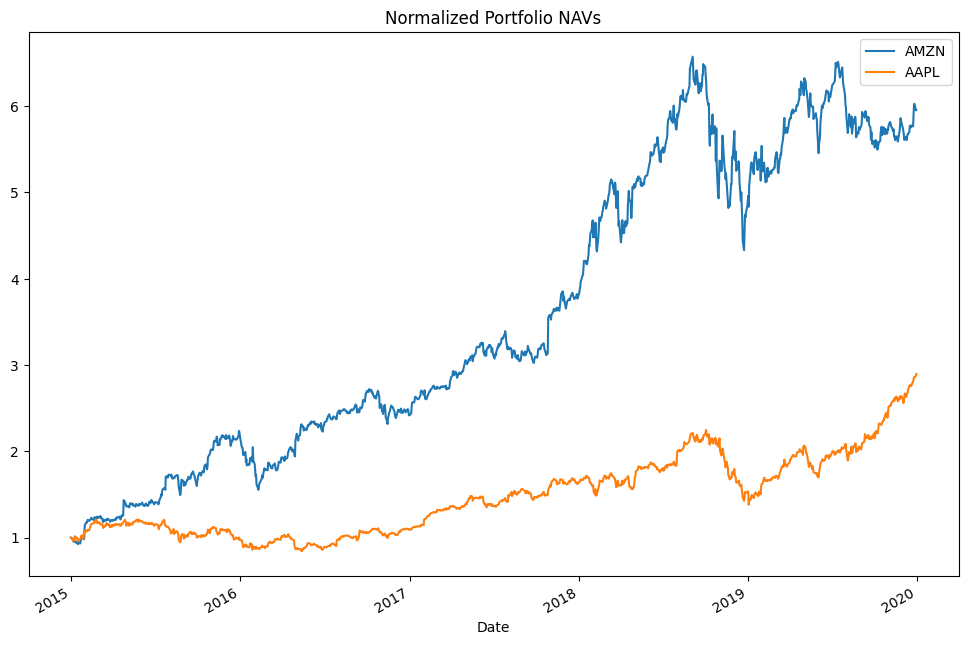

In [13]:
#Ploting Normalized Portfolio vs Initial Investment Amount
portfolioAlternate.plot(figsize=aspect_ratio, title='Normalized Portfolio NAV''s')

In [14]:
def print_pct_data(dataframe, format_specifier = '{:.4%}', na_rep = 'NaN'):
  return dataframe.style.format(format_specifier, na_rep=na_rep)

#print_pct_data(portfolioAlternate)

Question 4 : Calculating the log returns for both securities

In [15]:
#Calculate the log returns of both securities; “pretty-print” them using the
#print_pct_data function.
logReturns = np.log(portfolioAlternate / portfolioAlternate.shift(1))
print_pct_data(logReturns)

,AMZN,AAPL
Date,,
2014-12-31 00:00:00,NaN,NaN
2015-01-02 00:00:00,-0.5914%,-0.9558%
2015-01-05 00:00:00,-2.0731%,-2.8576%
2015-01-06 00:00:00,-2.3098%,0.0094%
2015-01-07 00:00:00,1.0544%,1.3925%
2015-01-08 00:00:00,0.6813%,3.7703%
2015-01-09 00:00:00,-1.1818%,0.1072%
2015-01-12 00:00:00,-1.8765%,-2.4949%
2015-01-13 00:00:00,1.1362%,0.8839%


Question 5: Verify that the log returns have only one NaN row and that it’s the first row.

In [16]:
#Calculating total NaN in log returns
logReturns.isnull().sum()

AMZN    1
AAPL    1
dtype: int64

In [17]:
#Verify that the log returns have only one NaN row and that it’s the first row.
logReturns.head(5)

,AMZN,AAPL
Date,,
2014-12-31,NaN,NaN
2015-01-02,-0.005914,-0.009558
2015-01-05,-0.020731,-0.028576
2015-01-06,-0.023098,0.000094
2015-01-07,0.010544,0.013925


Question 6: Plot the log returns using your plot_and_format_y_axis function, but
this time, the Y-axis should be formatted as %-figures. (Hint: if you’re using
matplotlib, then you can use the matplotlib.ticker library.) Plot the one-day
changes of the normalized portfolio from step 2 and compare – what do you notice
about the difference in magnitudes of the spikes in the early history between the %
returns and the $-daily changes?

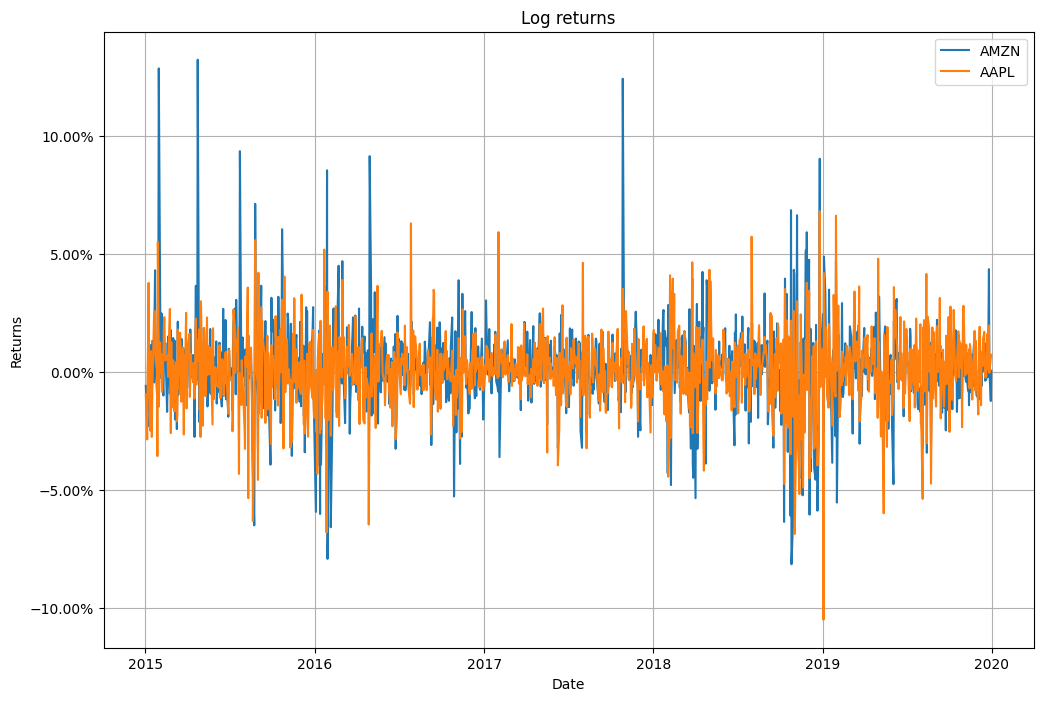

In [18]:
plot_and_format_y_axis(logReturns, formatter = mpl.ticker.PercentFormatter(1.0, decimals=2), title='Log returns', ylabel='Returns')

In [19]:
#Calculating one-day changes of normalized portfolio
dollar_change = portfolioNormalized.pct_change()

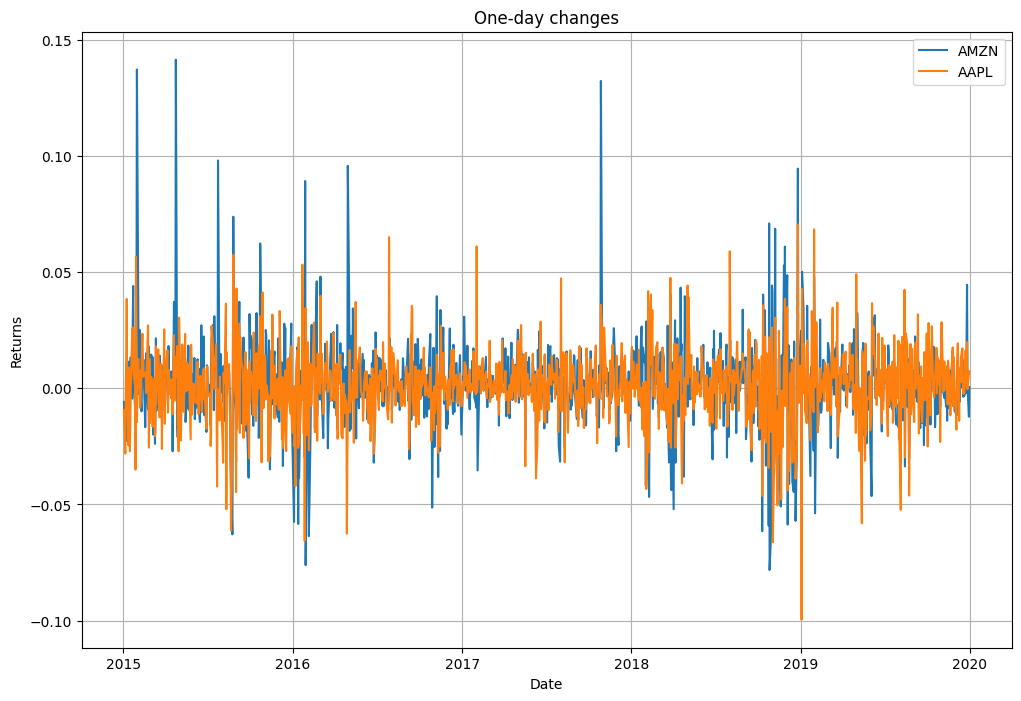

In [20]:
plot_and_format_y_axis(dollar_change, title='One-day changes', ylabel='Returns')

Cumulate the log returns, taking care to replace the NaN row with zeroes and
pretty print them.

In [ ]:
cum_log_returns = logReturns.cumsum().fillna(0)
print_pct_data(cum_log_returns)

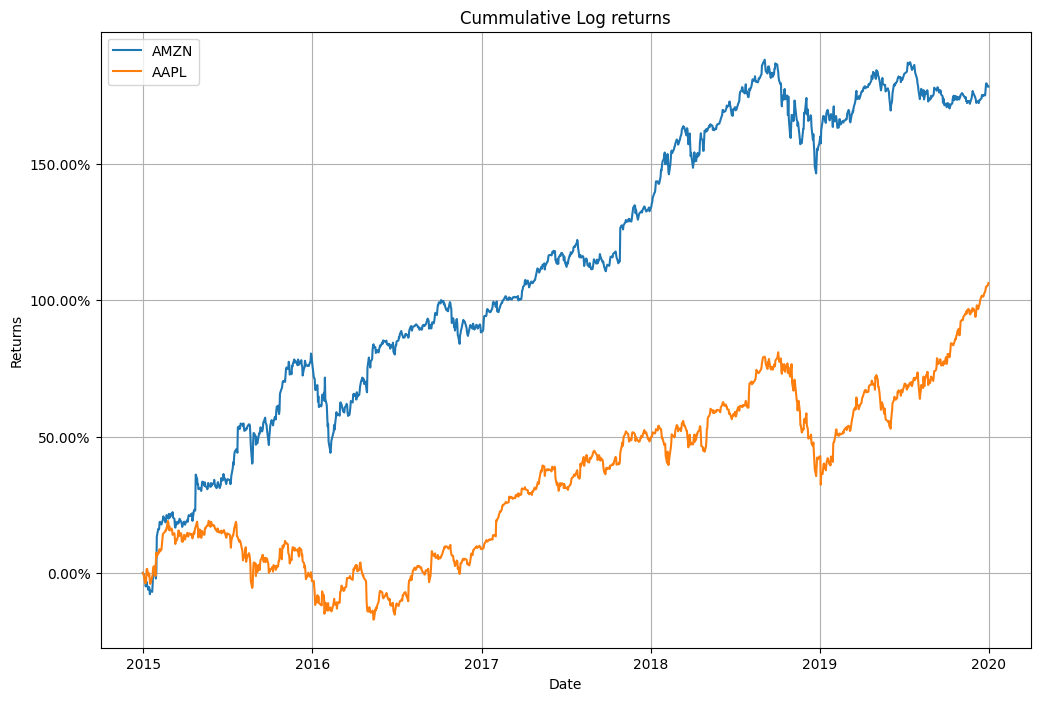

In [31]:
plot_and_format_y_axis(cum_log_returns, formatter = mpl.ticker.PercentFormatter(1.0, decimals=2), title='Cummulative Log returns', ylabel='Returns')

Which security comes out ahead? Amazon

**We pledge on our honor that we have not given nor received any unauthorized assistance on this
assignment to/from other groups.**

                             - Amuktha Nadipelli, Hamza Siddiqui, Lekhya Mudda, Shashank Patil